In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

seed = 0
np.random.seed(seed)

sns.set_style("whitegrid")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import csv

# Membuat list kosong untuk menampung data
rows = []

# Membaca file CSV dan mengumpulkan barisnya ke dalam list 'rows'
with open('ulasan_ruangguru.csv', 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    for row in csv_reader:
        rows.append(row)

# Membuat DataFrame dari list 'rows'
app_reviews_df = pd.DataFrame(rows[1:], columns=rows[0])



In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apk nya baguss bangettt,, tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk, artikel², dan beberapa fitur itu ada kayak tempatnya gitu ya,,, aku kurang nyaman sama tampilan home(versi mobile/ handphone ) nya aja,, kayak serasa sesek dan penuh aja gitu jadinya,,, mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan. Tapi aku suka kok apknya,,, bermanfaat bangett",5,1,6.83.0,2024-07-14 01:33:24,,,6.83.0
1,e363e495-4391-4831-89c8-76abaaa26ed1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menurut ku pake aplikasi ruangguru ini sangat mempermudah untuk aku belajar, tapi terkadang connection internetnya sangat lambat, aku mau nonton live teaching, connection nya terdeteksi jelek, padahal sudah aku cek, dan terdeteksi connection internet ku itu bagus, mungkin dari aku mohon bantuannya untuk di connection internet aja, selebihnya aku puas dengan pemakaian ruangguru, karna sangat mempermudah untuk belajar 😉😚",4,49,6.83.0,2024-07-05 22:15:10,Makasih ya Savana atas review. Pastikan ketika akses koneksi internetmu stabil minimal 2 mbps (cek melalui fast.com). Kami akan terus berinovasi memberikan pelayanan yang lebih baik kepada pengguna Ruangguru. Yuk update ke bintang 5 buat dukung kami jadi lebih baik ✨ - IW,2024-07-08 20:32:34,6.83.0
2,8afcc554-ac26-4a65-8e78-459f1f050d9b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menurut saya bagus yah banyak videonya kalau materinya kalian tidak dapat di kurikulum merdeka coba buka di kurikulum 13 sangat lengkap, juga mohon tambahkan subtitle pada video belajarnya agar dapat menulis semua yang disampaikan oleh gurunya.",5,43,6.83.0,2024-07-13 18:13:47,,,6.83.0
3,76c9f7c2-535d-4505-bd03-7709173ab68d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aku kelas 11 SMA dan baru pertama kali coba belajar di ruangguru. Aku ambil paket ruang belajar dan itu ngebantu aku bangett buat menguasai materi, penjelasannya ngga belibet dan yang paling aku suka ada rapor belajar. Di rapor belajar itu aku bisa tau seberapa jauh aku menguasai materi tertentu, terus kalo ada yang nilainya merah waktu kuis itu kita bisa tau dan review lagi. Menurutku itu yg sangatt membantu aku:D",5,213,6.83.0,2024-07-10 22:02:36,,,6.83.0
4,e93371bc-932e-47bf-a958-e027d412520e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"bagus banget. aku pakai aplikasi ini buat belajar pas lagi liburan akhir tahun, video2 pembelajaran di ruangguru ini penjelasannya mudah dimengerti!!! terus penjelasannya juga gak panjang bangetttt. selain itu ada soal nya juga yang membuat kita jadi semakin semangat belajarnya. btw aku baru makai apk ini seminggu buat persiapan kelas 9 nanti, awalnya coba2 tapi lama kelamaan jadi suka. pokoknya bagus banget deh apk ini!! wajib di download bagi diriku yang awalnya malas belajar😻😻",5,474,6.83.0,2024-07-06 23:43:04,"Makasih Ahya udah kasih kepercayaan ke Aplikasi Ruangguru untuk proses belajarmu. Seneng deh Aplikasi Ruangguru bisa membantu, dukunganmu jadi penyemangat kami untuk terus berkarya di Indonesia. Yuk follow Instagram @ruangguru untuk tahu informasi terupdate seputar Ruangguru 😊 - RN",2024-07-09 20:45:51,6.83.0


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71198 entries, 0 to 71197
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              71198 non-null  object
 1   userName              71162 non-null  object
 2   userImage             71162 non-null  object
 3   content               71142 non-null  object
 4   score                 71141 non-null  object
 5   thumbsUpCount         71141 non-null  object
 6   reviewCreatedVersion  71141 non-null  object
 7   at                    71141 non-null  object
 8   replyContent          71141 non-null  object
 9   repliedAt             71121 non-null  object
 10  appVersion            71121 non-null  object
dtypes: object(11)
memory usage: 6.0+ MB


In [ ]:
clean_df = app_reviews_df.dropna()

In [ ]:
clean_df = clean_df.drop_duplicates()

In [ ]:
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)


    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['di', 'ga', 'gaa', 'gak', 'iya', 'kah', 'ku', 'loh', 'na', 'nya', 'sih', 'woi', 'woii', 'woy', 'ya', 'yaa'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [ ]:
import requests

# URL file slang_word.txt di GitHub
url = 'https://raw.githubusercontent.com/linafadilh/resource-nlp-indonesia/main/slang_word.txt'

# Mendapatkan konten dari URL
response = requests.get(url)

# Memastikan respons berhasil
if response.status_code == 200:
    slangwords = {}

    # Memproses setiap baris dalam teks respons
    lines = response.text.splitlines()
    for line in lines:
        # Memastikan tidak ada baris kosong
        if line.strip():
            # Memisahkan baris berdasarkan tab atau spasi
            parts = line.split('\t')  # Jika menggunakan tab
            # parts = line.split()  # Jika menggunakan spasi

            if len(parts) == 2:
                slang = parts[0].strip().lower()
                formal = parts[1].strip()
                slangwords[slang] = formal
            else:
                # Menampilkan pesan peringatan untuk baris yang tidak sesuai format
                print(f"Baris tidak valid: {line}")

    print("Slangwords berhasil dimuat dari GitHub.")
else:
    print(f"Gagal memuat slangwords. Respons status code: {response.status_code}")


Slangwords berhasil dimuat dari GitHub.


In [ ]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apk nya baguss bangettt,, tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk, artikel², dan beberapa fitur itu ada kayak tempatnya gitu ya,,, aku kurang nyaman sama tampilan home(versi mobile/ handphone ) nya aja,, kayak serasa sesek dan penuh aja gitu jadinya,,, mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan. Tapi aku suka kok apknya,,, bermanfaat bangett",5,1,6.83.0,2024-07-14 01:33:24,,,6.83.0
1,e363e495-4391-4831-89c8-76abaaa26ed1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menurut ku pake aplikasi ruangguru ini sangat mempermudah untuk aku belajar, tapi terkadang connection internetnya sangat lambat, aku mau nonton live teaching, connection nya terdeteksi jelek, padahal sudah aku cek, dan terdeteksi connection internet ku itu bagus, mungkin dari aku mohon bantuannya untuk di connection internet aja, selebihnya aku puas dengan pemakaian ruangguru, karna sangat mempermudah untuk belajar 😉😚",4,49,6.83.0,2024-07-05 22:15:10,Makasih ya Savana atas review. Pastikan ketika akses koneksi internetmu stabil minimal 2 mbps (cek melalui fast.com). Kami akan terus berinovasi memberikan pelayanan yang lebih baik kepada pengguna Ruangguru. Yuk update ke bintang 5 buat dukung kami jadi lebih baik ✨ - IW,2024-07-08 20:32:34,6.83.0
2,8afcc554-ac26-4a65-8e78-459f1f050d9b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menurut saya bagus yah banyak videonya kalau materinya kalian tidak dapat di kurikulum merdeka coba buka di kurikulum 13 sangat lengkap, juga mohon tambahkan subtitle pada video belajarnya agar dapat menulis semua yang disampaikan oleh gurunya.",5,43,6.83.0,2024-07-13 18:13:47,,,6.83.0
3,76c9f7c2-535d-4505-bd03-7709173ab68d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aku kelas 11 SMA dan baru pertama kali coba belajar di ruangguru. Aku ambil paket ruang belajar dan itu ngebantu aku bangett buat menguasai materi, penjelasannya ngga belibet dan yang paling aku suka ada rapor belajar. Di rapor belajar itu aku bisa tau seberapa jauh aku menguasai materi tertentu, terus kalo ada yang nilainya merah waktu kuis itu kita bisa tau dan review lagi. Menurutku itu yg sangatt membantu aku:D",5,213,6.83.0,2024-07-10 22:02:36,,,6.83.0
4,e93371bc-932e-47bf-a958-e027d412520e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"bagus banget. aku pakai aplikasi ini buat belajar pas lagi liburan akhir tahun, video2 pembelajaran di ruangguru ini penjelasannya mudah dimengerti!!! terus penjelasannya juga gak panjang bangetttt. selain itu ada soal nya juga yang membuat kita jadi semakin semangat belajarnya. btw aku baru makai apk ini seminggu buat persiapan kelas 9 nanti, awalnya coba2 tapi lama kelamaan jadi suka. pokoknya bagus banget deh apk ini!! wajib di download bagi diriku yang awalnya malas belajar😻😻",5,474,6.83.0,2024-07-06 23:43:04,"Makasih Ahya udah kasih kepercayaan ke Aplikasi Ruangguru untuk proses belajarmu. Seneng deh Aplikasi Ruangguru bisa membantu, dukunganmu jadi penyemangat kami untuk terus berkarya di Indonesia. Yuk follow Instagram @ruangguru untuk tahu informasi terupdate seputar Ruangguru 😊 - RN",2024-07-09 20:45:51,6.83.0
...,...,...,...,...,...,...,...,...,...,...,...
71192,d090233f-1d09-4883-86b4-2aa656f29b64,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfs

In [ ]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apk nya baguss bangettt,, tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk, artikel², dan beberapa fitur itu ada kayak tempatnya gitu ya,,, aku kurang nyaman sama tampilan home(versi mobile/ handphone ) nya aja,, kayak serasa sesek dan penuh aja gitu jadinya,,, mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan. Tapi aku suka kok apknya,,, bermanfaat bangett",5,1,6.83.0,2024-07-14 01:33:24,,,6.83.0,Apk nya baguss bangettt tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk artikel² dan beberapa fitur itu ada kayak tempatnya gitu ya aku kurang nyaman sama tampilan homeversi mobile handphone nya aja kayak serasa sesek dan penuh aja gitu jadinya mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan Tapi aku suka kok apknya bermanfaat bangett,apk nya baguss bangettt tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk artikel² dan beberapa fitur itu ada kayak tempatnya gitu ya aku kurang nyaman sama tampilan homeversi mobile handphone nya aja kayak serasa sesek dan penuh aja gitu jadinya mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan tapi aku suka kok apknya bermanfaat bangett,apakah nya bagus banget tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yang utbk artikel² dan beberapa fitur itu ada kayak tempatnya begitu iya aku kurang nyaman sama tampilan homeversi mobile handphone nya saja kayak serasa sesak dan penuh saja begitu jadinya mungkin kalau sedikit dirubah dengan jarak dan beberapa di pindahkan akan lebih nyaman saja digunakan tapi aku suka kok apknya bermanfaat banget,"[apakah, nya, bagus, banget, tapi, aku, ada, sedikit, kritik, untuk, tampilan, layar, nya, kalau, di, web, kan, untuk, yang, utbk, artikel², dan, beberapa, fitur, itu, ada, kayak, tempatnya, begitu, iya, aku, kurang, nyaman, sama, tampilan, homeversi, mobile, handphone, nya, saja, kayak, serasa, sesak, dan, penuh, saja, begitu, jadinya, mungkin, kalau, sedikit, dirubah, dengan, jarak, dan, beberapa, di, pindahkan, akan, lebih, nyaman, saja, digunakan, tapi, aku, suka, kok, apknya, bermanfaat, banget]","[bagus, banget, kritik, tampilan, layar, web, utbk, artikel², fitur, kayak, tempatnya, nyaman, tampilan, homeversi, mobile, handphone, kayak, serasa, sesak, penuh, dirubah, jarak, pindahkan, nyaman, suka, apknya, bermanfaat, banget]",bagus banget kritik tampilan layar web utbk artikel² fitur kayak tempatnya nyaman tampilan homeversi mobile handphone kayak serasa sesak penuh dirubah jarak pindahkan nyaman suka apknya bermanfaat banget
1,e363e495-4391-4831-89c8-76abaaa26ed1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menurut ku pake aplikasi ruangguru ini sangat mempermudah untuk aku belajar, tapi terkadang connection internetnya sangat lambat, aku mau nonton live teaching, connection nya terdeteksi jelek, padahal sudah aku cek, dan terdeteksi connection internet ku itu bagus, mungkin dari aku mohon bantuannya untuk di connection internet aja, selebihnya aku puas dengan pemakaian ruangguru, karna sangat mempermudah untuk belajar 😉😚",4,49,6.83.0,2024-07-05 22:15:10,Makasih ya Savana atas review. Pastikan ketika akses koneksi internetmu stabil minimal 2 mbps (cek melalui fast.com). Kami akan terus berinovasi memberikan pelayanan yang lebih baik kepada pengguna Ruangguru. Yuk update ke bintang 5 buat dukung kami jadi lebih bai

In [ ]:
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/linafadilh/resource-nlp-indonesia/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/linafadilh/resource-nlp-indonesia/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'

    return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    52253
negative    18868
Name: count, dtype: int64


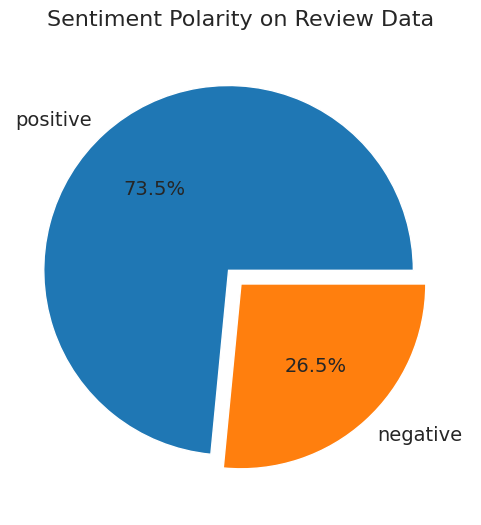

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0.1, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()


In [ ]:
pd.set_option('display.max_colwidth', 3000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']

positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

positive_tweets = positive_tweets.reset_index(drop=True)

positive_tweets.index += 1

In [ ]:
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']

negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

negative_tweets = negative_tweets[0:10]

negative_tweets = negative_tweets.reset_index(drop=True)

negative_tweets.index += 1


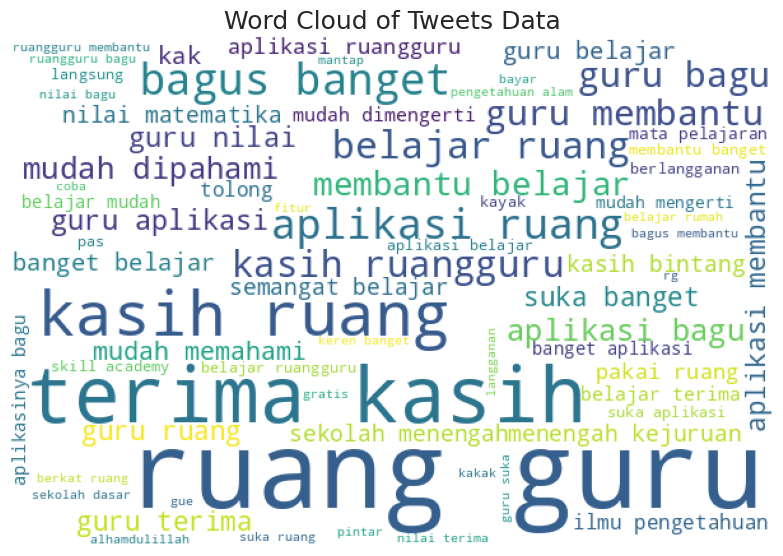

In [ ]:
list_words = ''

for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Tweets Data', fontsize=18)

ax.grid(False)

ax.imshow((wordcloud))

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()


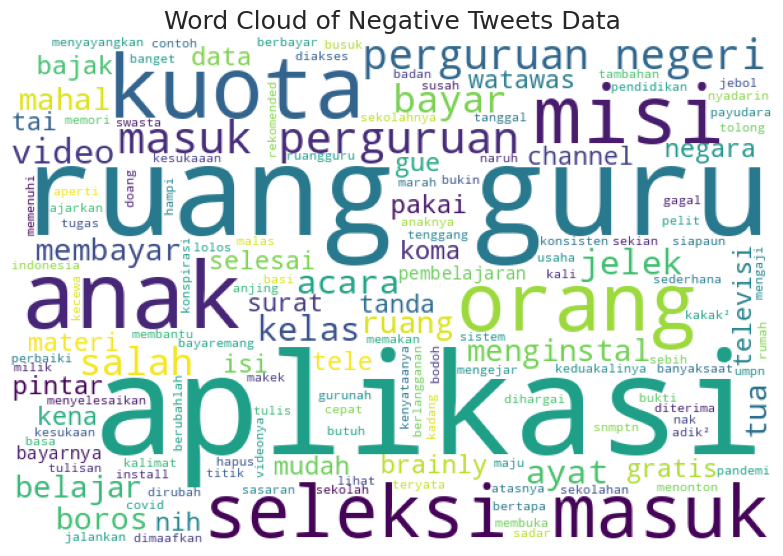

In [ ]:
list_words = ''

for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

ax.grid(False)

ax.imshow((wordcloud))

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()


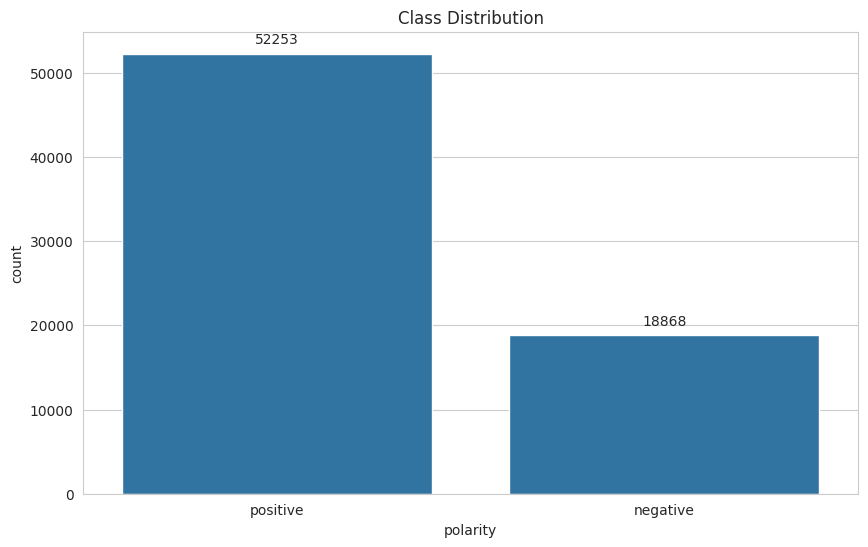

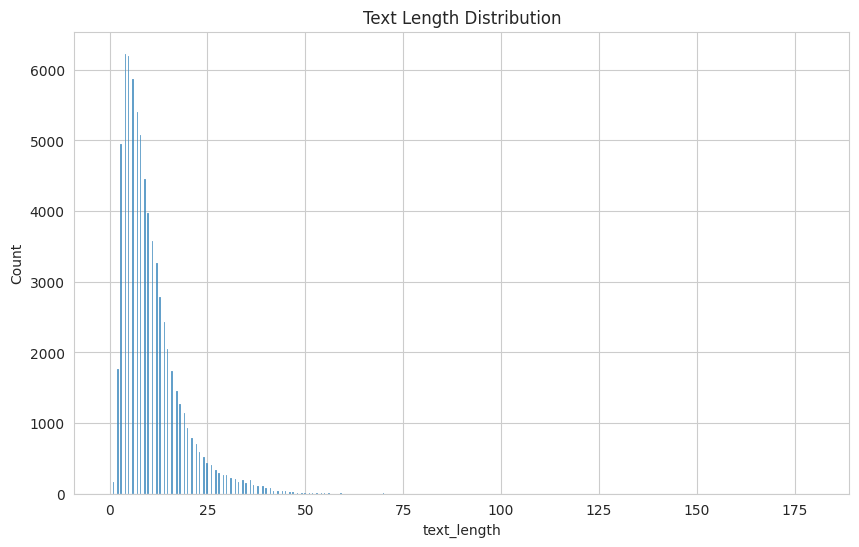

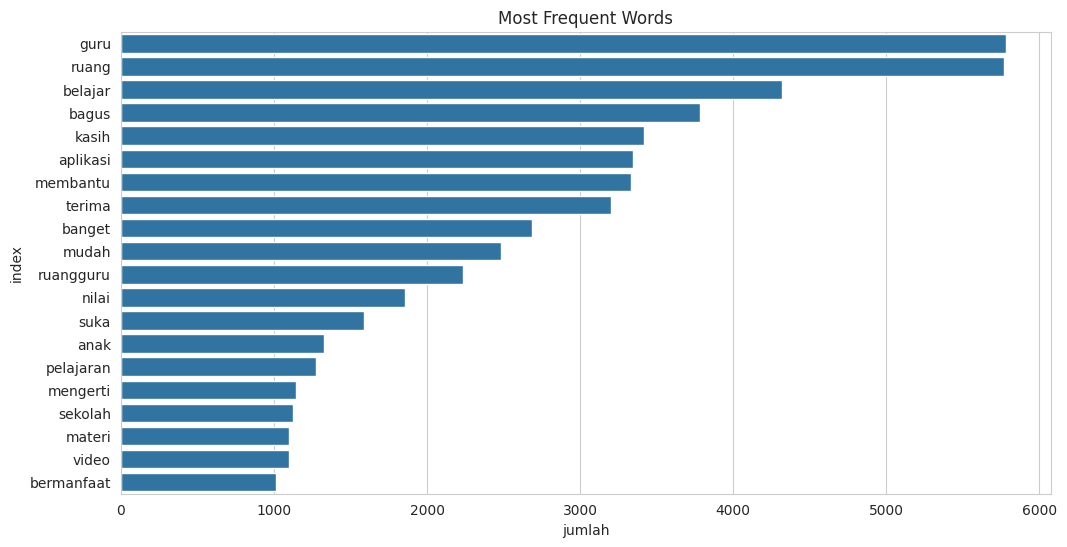

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apk nya baguss bangettt,, tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk, artikel², dan beberapa fitur itu ada kayak tempatnya gitu ya,,, aku kurang nyaman sama tampilan home(versi mobile/ handphone ) nya aja,, kayak serasa sesek dan penuh aja gitu jadinya,,, mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan. Tapi aku suka kok apknya,,, bermanfaat bangett",5,1,6.83.0,2024-07-14 01:33:24,,,6.83.0,Apk nya baguss bangettt tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk artikel² dan beberapa fitur itu ada kayak tempatnya gitu ya aku kurang nyaman sama tampilan homeversi mobile handphone nya aja kayak serasa sesek dan penuh aja gitu jadinya mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan Tapi aku suka kok apknya bermanfaat bangett,apk nya baguss bangettt tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yg utbk artikel² dan beberapa fitur itu ada kayak tempatnya gitu ya aku kurang nyaman sama tampilan homeversi mobile handphone nya aja kayak serasa sesek dan penuh aja gitu jadinya mungkin kalau sedikit diubah dengan jarak dan beberapa di pindahkan akan lebih nyaman aja digunakan tapi aku suka kok apknya bermanfaat bangett,apakah nya bagus banget tapi aku ada sedikit kritik untuk tampilan layar nya kalau di web kan untuk yang utbk artikel² dan beberapa fitur itu ada kayak tempatnya begitu iya aku kurang nyaman sama tampilan homeversi mobile handphone nya saja kayak serasa sesak dan penuh saja begitu jadinya mungkin kalau sedikit dirubah dengan jarak dan beberapa di pindahkan akan lebih nyaman saja digunakan tapi aku suka kok apknya bermanfaat banget,"[apakah, nya, bagus, banget, tapi, aku, ada, sedikit, kritik, untuk, tampilan, layar, nya, kalau, di, web, kan, untuk, yang, utbk, artikel², dan, beberapa, fitur, itu, ada, kayak, tempatnya, begitu, iya, aku, kurang, nyaman, sama, tampilan, homeversi, mobile, handphone, nya, saja, kayak, serasa, sesak, dan, penuh, saja, begitu, jadinya, mungkin, kalau, sedikit, dirubah, dengan, jarak, dan, beberapa, di, pindahkan, akan, lebih, nyaman, saja, digunakan, tapi, aku, suka, kok, apknya, bermanfaat, banget]","[bagus, banget, kritik, tampilan, layar, web, utbk, artikel², fitur, kayak, tempatnya, nyaman, tampilan, homeversi, mobile, handphone, kayak, serasa, sesak, penuh, dirubah, jarak, pindahkan, nyaman, suka, apknya, bermanfaat, banget]",bagus banget kritik tampilan layar web utbk artikel² fitur kayak tempatnya nyaman tampilan homeversi mobile handphone kayak serasa sesak penuh dirubah jarak pindahkan nyaman suka apknya bermanfaat banget,3,positive,28
1,e363e495-4391-4831-89c8-76abaaa26ed1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menurut ku pake aplikasi ruangguru ini sangat mempermudah untuk aku belajar, tapi terkadang connection internetnya sangat lambat, aku mau nonton live teaching, connection nya terdeteksi jelek, padahal sudah aku cek, dan terdeteksi connection internet ku itu bagus, mungkin dari aku mohon bantuannya untuk di connection internet aja, selebihnya aku puas dengan pemakaian ruangguru, karna sangat mempermudah untuk belajar 😉😚",4,49,6.83.0,2024-07-05 22:15:10,Makasih ya Savana atas review. Pastikan ketika akses koneksi internetmu stabil minimal 2 mbps (cek melalui fast.com). Kami akan terus berinovasi memberikan pelayanan yang lebih baik kepada pengguna Ruangguru. Yuk u

In [ ]:
X = clean_df['text_akhir']
y = clean_df['polarity']

In [ ]:
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,academy,alam,alhamdulillah,amin,anak,animasi,animasinya,apl,aplikasi,aplikasinya,...,tua,tugas,uang,ujian,ulangan,unduh,video,videonya,vidionya,wawasan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169750,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.224064,0.301345,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106937,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.176529,0.159439,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
71117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327026,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.539847,0.000000,0.000000,0.0,0.0
71118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
71119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.828599550056243
Naive Bayes - accuracy_test: 0.8272759226713533


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9859744094488189
Random Forest - accuracy_test: 0.8799297012302285


In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9145985658042745
Logistic Regression - accuracy_test: 0.9073462214411248


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9859744094488189
Decision Tree - accuracy_test: 0.8384534270650263


In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.827276
1        Random Forest       0.879930
2  Logistic Regression       0.907346
3        Decision Tree       0.838453


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                 Model  Accuracy Test
2  Logistic Regression       0.907346
1        Random Forest       0.879930
3        Decision Tree       0.838453
0          Naive Bayes       0.827276


Karena logistic regression yg palint tinggi jadi saya memakai logistic regression

In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: susah dipahami
Sentimen kalimat baru adalah NEGATIF.
